<a href="https://colab.research.google.com/github/OnisOris/ThreeDTool/blob/main/Examples_ThreeDTool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка последней версии ThreeDTool с github.com
Версия на PyPi пока не обновилась и не все новые функции доступны, поэтому ставим с помощью команды ниже с github

In [1]:
!pip install git+https://github.com/OnisOris/ThreeDTool

  Cloning https://github.com/OnisOris/ThreeDTool to /tmp/pip-req-build-oqzjqkvm
  Running command git clone --filter=blob:none --quiet https://github.com/OnisOris/ThreeDTool /tmp/pip-req-build-oqzjqkvm
  Resolved https://github.com/OnisOris/ThreeDTool to commit 6c8c0a79dfaf9ad0a5f16d25ead2200e0077bc15
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 7.6 MB/s eta 0:00:00
  Created wheel for ThreeDTool: filename=ThreeDTool-0.0.4-py3-none-any.whl size=44973 sha256=61c737a27f130942f7af266fefb2034b4c766e15c1bcff8e1b8c13e79397a156
  Stored in

# Анализ положения квадратов
Создадим два квадрата с вершинами [[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]]  и [[1.5, 0, 0], [1.5, 1, 0], [0.5, 1, 0], [0.5, 0, 0]].

Они находятся в одной плоскости и пересекаются. Найдем точки пересечения

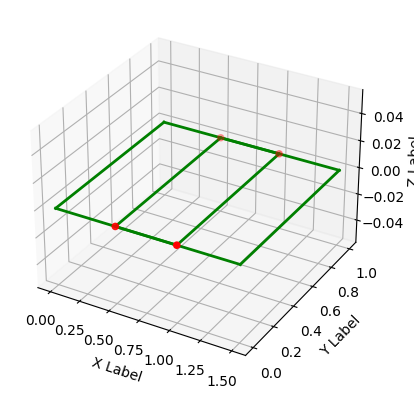

In [2]:
import ThreeDTool as tdt
import numpy as np

# Первый прямоугольник состоит из четырех вершин
pol1 = tdt.Polygon(np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]]))

# Второй прямоугольник состоит тоже из четырех вершин

pol2 = np.array([[1.5, 0, 0], [1.5, 1, 0], [0.5, 1, 0], [0.5, 0, 0]])

# Создадим объект многоугольника, чтобы его можно было отобразить на графике
pol2 = tdt.Polygon(pol2)

# Функция для нахождения пересечений прямоугольников, возвращающая точки
points = pol1.points_from_polygon_polygon_intersection(pol2)

# Создадим объект класс обертку для точек, в него нужно помещать матрицу
# nx3, где n - количество точек
points = tdt.Points(points, s=20, color='red')

# Создадим объект Dspl, который кушает объекты с реализованным методом show(ax)
# и отображает эти объекты, когда применяем метод show к объекту Dspl
dp0 = tdt.Dspl([pol1, pol2, points])

# Отобразим наш график
dp0.show()

Для изучения данной функции повернем один из прямоугольников

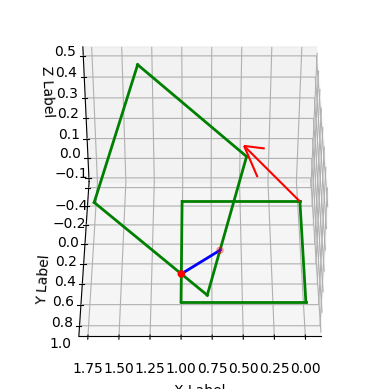

In [3]:
# Попробуем его покрутить в пространстве по оси [1, 1, 1] на угол в 30 градусов
axis = [1, 1, 1]

# Переопределим вершины прямоугольника
pol2 = np.array([[1.5, 0, 0], [1.5, 1, 0], [0.5, 1, 0], [0.5, 0, 0]])

# Поворот прямоугольника
pol2 = tdt.rot_v(pol2, np.pi/6,  axis)

# Создадим объект многоугольника, чтобы его можно было отобразить на графике
pol2 = tdt.Polygon(pol2)

# Найдем точки пересечения многоугольников
points = pol1.points_from_polygon_polygon_intersection(pol2)
line_s = tdt.Line_segment(point1=points[0], point2=points[1])

# Ось попробуем отобразить с помощью класса Fvec, который хранит в себе координату и вектор вида:
# [x, y, z, px, py, pz]
axis = tdt.Fvec([0, 0, 0], axis)
axis.length = 0.5

# Создадим объект класс обертку для точек, в него нужно помещать матрицу nx3,
# где n - количество точек
points = tdt.Points(points, s=20, color='red')

# Создадим объект Dspl, который кушает объекты с реализованным методом show(ax)
# и отображает эти объекты, когда применяем метод show к объекту Dspl
dp = tdt.Dspl([pol1, pol2, points, line_s, axis])
# Далее мы можем настраивать разные ракурсы графика, eval - угол наклона, axim -
# азимут (Угол между горизонтальной плоскостью меридиана и вертикальной
# плоскостью наблюдаемого объекта)
dp.ax.view_init(elev=40, azim=90)

# Отобразим наш график
dp.show()


Как мы можем видеть, прямоугольники пересеклись в области, указанной синей линией. Красная стрелка показывает ось поворота квадрата, который был до этого в плоскости

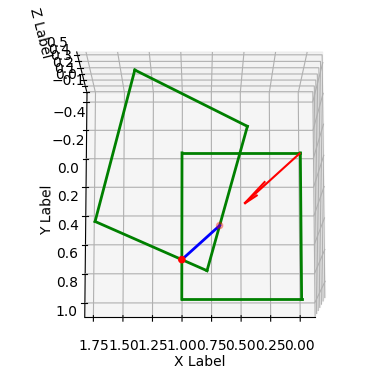

In [4]:
# Для повторного отображения необходимо воспользоваться методом
# create_subplot3D()
dp.create_subplot3D()
dp.ax.view_init(elev=80, azim=90)
dp.show()

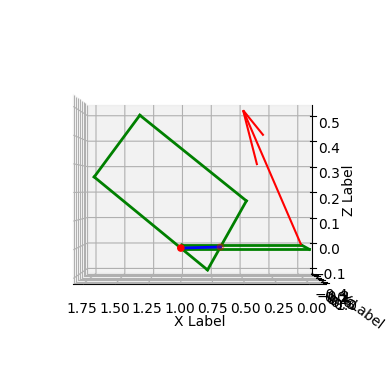

In [5]:
dp.create_subplot3D()
dp.ax.view_init(elev=00, azim=90)
dp.show()

# Создание отрезков
Создадим первый отрезок



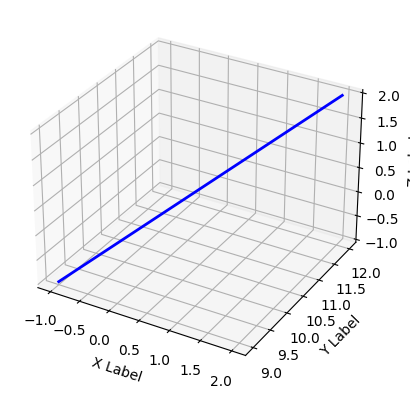

In [6]:
import ThreeDTool as tdt
seg = tdt.Line_segment(point1=[-1, 9, -1], point2=[2, 12, 2])
dp = tdt.Dspl([seg])
dp.show()

Создадим второй отрезок

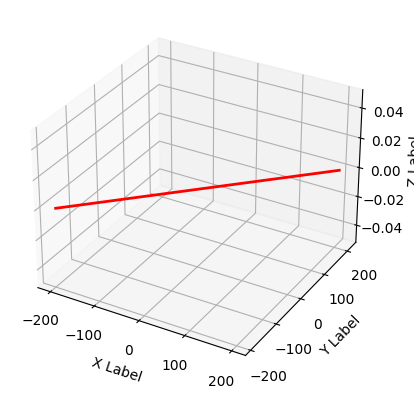

In [7]:
seg2 = tdt.Line_segment(point1=[-200, -190, 0], point2=[200, 210, 0])
# Поменяем цвет линии
seg2.color = 'red'
dp2 = tdt.Dspl([seg2])
dp2.show()

Найдем точку пересечения отрезков

In [8]:
point_inters = tdt.Points(tdt.point_from_segment_segment_intersection(seg, seg2), s=30, color='green')
point_inters.xyz

array([ 0., 10.,  0.])

Изобразим отрезки и их пересечение

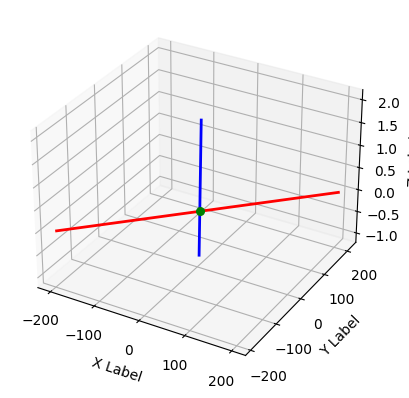

In [9]:
dp3 = tdt.Dspl([seg, seg2, point_inters])
dp3.show()

# Генерация пятиосевой траектории
В данном разделе мы сгенерируем одну локсодрому - это траектория, представляющая собой объемную спираль. После этого создадим вектора поворота в каждой точке для задания положения объекта.

Скачаем файл с ограничесвающей STL моделью

In [10]:
!curl -O https://raw.githubusercontent.com/OnisOris/5X3D-slicer/main/tests/test_functions/test_models/cube.stl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3080  100  3080    0     0   8295      0 --:--:-- --:--:-- --:--:--  8301


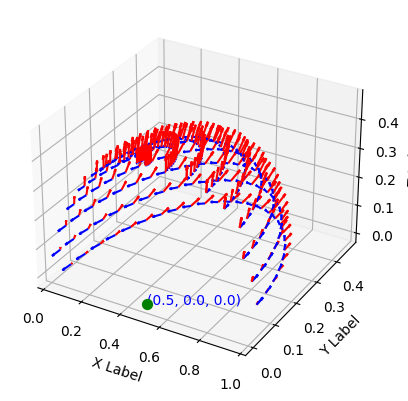

In [11]:
import trimesh
import ThreeDTool as tdt
import matplotlib as mpl
import numpy as np

# Путь до файла
path = "/content/cube.stl"

# Используем функцию open с параметром "r" (чтение)
with open(path, 'r') as f:
    # Парсим координаты нормалей и вершин треугольников в triangles
    triangles, name = tdt.parse_stl(f)

# Сохраним треугольники в tr. Каждый треугольник будет сохраняться в объект
# класса Triangle
tr = np.array([])
for item in triangles:
    tr = np.hstack([tr, tdt.Triangle(item)])

# Создаем многогранник или полиэдр
polyhedron = tdt.Polyhedron(tr)

# Вычисление радиуса. Вычисляем максимальный радиус локсодромы.
r = np.array([np.linalg.norm(polyhedron.get_min_max()[0]),
              np.linalg.norm(polyhedron.get_min_max()[1])])
rmax = np.max(r)/2
point_n = polyhedron.get_median_point() - [0, 0.5, 0.5]
# Генерация локсодромы
arr = tdt.generate_loxodromes(r=rmax, point_n=point_n, steps=0.001)
# Функция нарезания локосдромы объемом STL модели
cc = tdt.cut_curve(arr[2], path)
# Точка, с которой вычисляются вектора вертикального поворота (красные стрелки)
center_point = point_n
# Оборачиваем точку классом Points для удобства отображения
center_p = tdt.Points([center_point], s=50, color='green', text=True)
# Массив, куда мы сохраним пятизначные траектории
curves5x = np.array([])
for curve in cc:
    # Класс обертка для пятиосевой траектории
    out_curve = tdt.Curve5x()
    for i, item in enumerate(curve.curve_array):
        # Функция для вычисления вектора из двух точек
        vector_z = tdt.vector_from_two_points(center_point, item)
        vector_z[0] = 0
        if i == curve.curve_array.shape[0] - 1:
            point5 = out_curve[i - 1]
        else:
            vector_x = tdt.vector_from_two_points(curve.curve_array[i + 1],
                                                  item)
            vector_x[2] = 0
            point5 = np.hstack([item, vector_z, vector_x])
        out_curve.union(point5)
        tdt.angles_from_vector(point5)
    curves5x = np.hstack([curves5x, out_curve])
# Отобразим все объекты, объеденив их в all_objects
# (траектории - curves5x и точка - center_p)
all_objects = np.hstack([curves5x, center_p])
dp = tdt.Dspl(all_objects)
# Отображение
dp.show()

# Нарезание моделей
В данном примере мы будем нарезать STL модель с помощью плоскости, которая будет постепенно подниматься с самой нижней точки на определенное расстояние - высоту слоя thick

Использовать для работы мы будем тот же файл, что и ранее cube.stl

In [12]:
!curl -O https://raw.githubusercontent.com/OnisOris/5X3D-slicer/main/tests/test_functions/test_models/cube.stl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3080  100  3080    0     0  32171      0 --:--:-- --:--:-- --:--:-- 32421


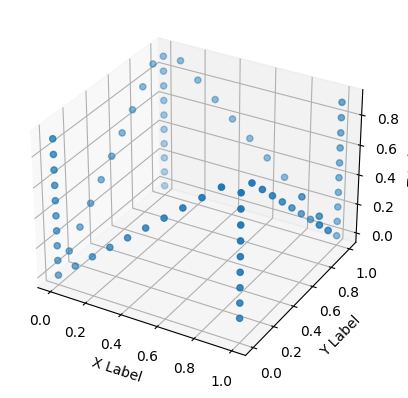

In [15]:
from ThreeDTool import *
import matplotlib as mpl

# Путь до файла
path = "/content/cube.stl"
file = open(path, "r")
parser = Parser_stl()
triangles, name = parser.parse_stl(file)
file.close()

def slicing(triangles, thiсk=0.1):
    # Находим пограничные координаты модели:
    max_xyz, min_xyz = max_min_points(triangles)
    # Находим минимальную координату:
    z_min = min_xyz[2]
    # Находим самую высокую часть модели:
    z_max = max_xyz[2]
    # Найдем высоту модели:
    hight = distance_between_two_points(z_min, z_max)
    # Количество слоев:
    amount_of_layers = hight / thiсk
    plane_array = np.array([])
    # Плоскость нарезания
    slice_plane = Plane(0, 0, 1, -z_min)
    points_array = []
    # Пройдем по всем слоям
    for _ in range(int(amount_of_layers)):
        # Пройдемся по всем треугольникам
        for triangle in triangles:
            try:
                position_index, points = position_analyze_of_triangle(triangle, slice_plane)
            except TypeError:
                logger.error(f"error")
            if position_index == 2:
                # Создаем плоскость треугольника
                plane = Plane()
                # Функция создания плоскости из треугольника
                plane.create_plane_from_triangle(triangle, create_normal=True)
                # Создаем линию пересечения плоскостей треугольника и плоскости слайсинга
                line = Line()
                line.line_from_planes(plane, slice_plane)
                # Линии из вершин треугольников
                line1 = Line()
                line1.line_create_from_points(points[0, 0], points[0, 1])
                line2 = Line()
                line2.line_create_from_points(points[1, 0], points[1, 1])
                # Точки пересечения линий
                point1 = point_from_line_line_intersection(line, line1)
                point2 = point_from_line_line_intersection(line, line2)
                if point1.__class__ == np.ndarray:
                    points_array.append(point1)
                if point2.__class__ == np.ndarray:
                    points_array.append(point2)
        slice_plane.d -= 0.1
    points_array = np.array(points_array)
    u, idx = np.unique(points_array, axis=0, return_index=True)
    points_array = u[idx.argsort()]
    return points_array.T

points = slicing(triangles)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0], points[1], points[2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
